In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

* 테스트 환경 설정
    * 파이썬이 설치 되어 있는 커맨드 창 실행(아나콘다 환경은 아나콘다 파워쉘, 파이썬 환경은 cmd)
    * html 파일이 있는 곳으로 cd
    * 파이썬 웹서버 구동
    * 향후 localhost:8080/page1.html 접속되는지 확인

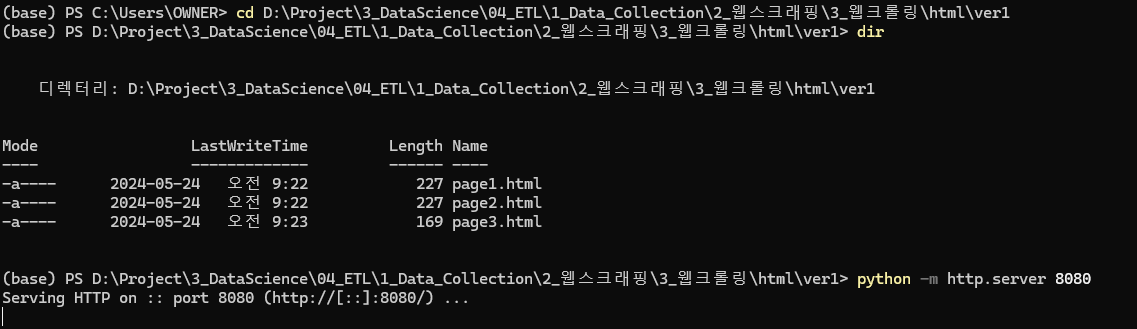

In [10]:
# 크롤링할 웹사이트 URL
url = 'http://localhost:8080/page1.html'
driver.get(url)
# driver.maximize_window()
# 결과를 저장할 리스트
books = []

In [11]:
try:
    while True:
        # DOM이 완전히 로드되고 자바스크립트가 실행될 때까지 기다림
        driver.implicitly_wait(3) 

        # 현재 페이지의 책 정보 수집
        # find_elements: html 요소를 찾는 함수
        # By.TAG_NAME: 태그를 기준으로 검색
        items = driver.find_elements(By.TAG_NAME, 'li')
        for item in items:
            books.append(item.text)

        # 'Next' 페이지 링크를 찾아 클릭
        next_links = driver.find_elements(By.TAG_NAME, 'a')
        if next_links:
            next_links[0].click() # 해당 링크를 실제로 클릭하는 효과
        else:
            break  # 'Next' 페이지 링크가 없으면 종료
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # 드라이버 종료
    driver.close()

In [12]:
# 수집한 데이터 출력
for book in books:
    print(book)

Book 1 - $10
Book 2 - $15
Book 3 - $20
Book 4 - $12
Book 5 - $18
Book 6 - $25
Book 7 - $30
Book 8 - $35
